In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import make_pipeline

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


# Titanic 과제

## Perprocessing

In [ ]:
df = pd.read_csv('tdata/titanic.csv')
df = df[['Fare','Sex', 'Pclass', 'Age', 'Survived']]
df

,Fare,Sex,Pclass,Age,Survived
0,7.2500,male,3,22.0,0
1,71.2833,female,1,38.0,1
2,7.9250,female,3,26.0,1
3,53.1000,female,1,35.0,1
4,8.0500,male,3,35.0,0
...,...,...,...,...,...
886,13.0000,male,2,27.0,0
887,30.0000,female,1,19.0,1
888,23.4500,female,3,NaN,0
889,30.0000,male,1,26.0,1


In [ ]:
df.isnull().sum()

Fare          0
Sex           0
Pclass        0
Age         177
Survived      0
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.isnull().sum()

Fare        0
Sex         0
Pclass      0
Age         0
Survived    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
temp = encoder.fit_transform(df['Sex'])
df['Sex'] = temp #male = 1, female = 0

## TENSORFLOW

In [ ]:
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,[-1]].values

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_data)
test = scaler.transform([[30, 0, 1, 25]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,
                                                    y_data,
                                                    test_size = 0.3,
                                                    stratify = y_data,
                                                    random_state= 111)

In [ ]:
x = tf.constant(x_train, tf.float32)
y = tf.constant(y_train, tf.float32)

initX = tf.initializers.GlorotUniform()
w = tf.Variable(initX(shape= [x_train.shape[1],y_train.shape[1]])) #[feature, label]
b = tf.Variable(initX(shape = [y_train.shape[1]])) # label

In [ ]:
w.shape, b.shape

(TensorShape([4, 1]), TensorShape([1]))

In [ ]:
def compute_loss():
    z = tf.matmul(x,w) + b
    hx = tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits = z)
    cost = tf.reduce_mean(hx)
    return cost

In [ ]:
optimizer = Adam(0.1)
patience = 100
min_delta = 0.001
pcnt = 0
hist_cost = []

for i in range(1000):
    optimizer.minimize(compute_loss, var_list = [w,b])
    c = compute_loss().numpy()
    hist_cost.append(c)
    print(i, "cost: ", compute_loss().numpy())

    if i >0:
        if hist_cost[i-1] - hist_cost[i] > min_delta:
            pcnt = 0
        else:
            pcnt += 1
        if pcnt >= patience:
            print('early stop')
            break

0 cost:  0.7362361
1 cost:  0.7174829
2 cost:  0.6993508
3 cost:  0.6820705
4 cost:  0.66580224
5 cost:  0.6505354
6 cost:  0.63607454
7 cost:  0.6222267
8 cost:  0.6089513
9 cost:  0.59629554
10 cost:  0.5842922
11 cost:  0.5729312
12 cost:  0.5621808
13 cost:  0.5520208
14 cost:  0.54245996
15 cost:  0.53352356
16 cost:  0.5252253
17 cost:  0.51755047
18 cost:  0.51046485
19 cost:  0.50393486
20 cost:  0.4979388
21 cost:  0.49246085
22 cost:  0.4874766
23 cost:  0.48294747
24 cost:  0.47882843
25 cost:  0.47508046
26 cost:  0.47167605
27 cost:  0.46859267
28 cost:  0.46580684
29 cost:  0.46329093
30 cost:  0.46101823
31 cost:  0.45896673
32 cost:  0.45712066
33 cost:  0.45546573
34 cost:  0.4539865
35 cost:  0.45266518
36 cost:  0.4514844
37 cost:  0.45042917
38 cost:  0.4494873
39 cost:  0.4486476
40 cost:  0.44789803
41 cost:  0.4472263
42 cost:  0.44662094
43 cost:  0.4460729
44 cost:  0.4455753
45 cost:  0.44512224
46 cost:  0.44470808
47 cost:  0.44432703
48 cost:  0.44397473
49

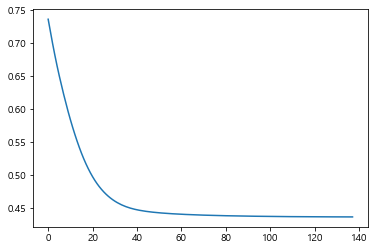

In [ ]:
plt.plot(hist_cost)

In [ ]:
def hxFn(xData):
    xd = tf.constant(xData, tf.float32)
    z = tf.matmul(xd, w) + b
    hx = tf.nn.sigmoid(z)
    return (hx.numpy()>0.5) + 0
#['Survived' if (hx.numpy()>0.5) + 0 else 'Dead']

In [ ]:
pred = hxFn(x_test)
(pred == y_test).mean()

0.7798507462686567

In [ ]:
def resultFn(x):
    return ['Survived' if x==1 else 'Dead']

In [ ]:
resultFn(hxFn(test))

['Survived']

In [ ]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
print(f1_score(y_test, pred))
print("*"*30)
print(confusion_matrix(y_test, pred))

0.7005076142131981
******************************
[[140  25]
 [ 34  69]]


## KERAS

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train,
                                                      y_train,
                                                      test_size = 0.2,
                                                      stratify = y_train,
                                                      random_state= 111)

In [ ]:
def createModel():
    dense = Dense(units= 1, input_dim = 4, activation = 'sigmoid')
    model = Sequential([dense])
    model.compile(loss='binary_crossentropy', optimizer=Adam(0.1), metrics=['acc'])
    return model

In [ ]:
earlyStop = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 100)
kcf = KerasClassifier(build_fn = createModel, epochs = 1000, verbose = 1, callbacks = [earlyStop],validation_data=(x_valid, y_valid))

<ipython-input-284-8233eceb7c7e>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  kcf = KerasClassifier(build_fn = createModel, epochs = 1000, verbose = 1, callbacks = [earlyStop],validation_data=(x_valid, y_valid))


In [ ]:
pmodel = make_pipeline(MinMaxScaler(), kcf)
pmodel.fit(x_train, y_train)

Epoch 1/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.5737 - acc: 0.7008 - val_loss: 0.5333 - val_acc: 0.8000
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.5002 - acc: 0.7570 - val_loss: 0.4864 - val_acc: 0.7920
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.4662 - acc: 0.7952 - val_loss: 0.4805 - val_acc: 0.7920
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4625 - acc: 0.7952 - val_loss: 0.4833 - val_acc: 0.8000
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4553 - acc: 0.7952 - val_loss: 0.4800 - val_acc: 0.7920
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4534 - acc: 0.7972 - val_loss: 0.4764 - val_acc: 0.7920
Epoch 7/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.4498 - acc: 0.7952 - val_loss: 0.4804 - val_acc: 0.8000
Epoch 8/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kerasclassifier',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x0000029657056AF0>)])

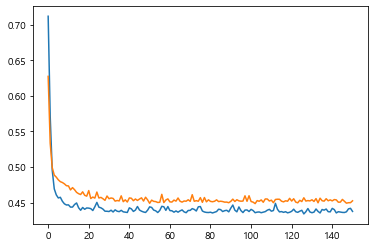

In [ ]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

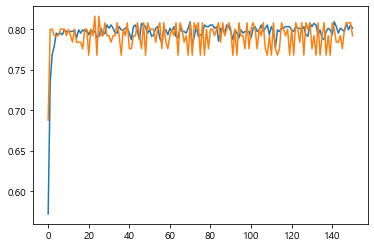

In [ ]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])

In [ ]:
def resultFn(x):
    res = int(x)
    return ['Survived' if res ==1 else 'Dead']

resultFn(pmodel.predict(test))

['Survived']

In [ ]:
print(f1_score(y_test, pmodel.predict(x_test)))
print("*"*30)
print(confusion_matrix(y_test, pmodel.predict(x_test)))

0.6944444444444445
******************************
[[127  38]
 [ 28  75]]


Text(34.0, 0.5, 'Real')

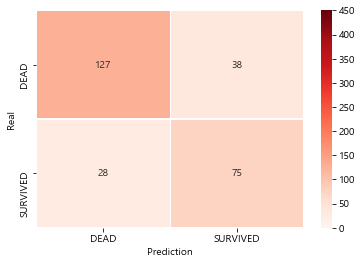

In [ ]:
sns.heatmap(confusion_matrix(y_test,
                             pmodel.predict(x_test)),
                             annot= True,
                             fmt= 'd',
                             linewidths= 0.2,
                             cmap = 'Reds',
                             vmin= 0,
                             vmax =450,
                             xticklabels=['DEAD','SURVIVED'],
                             yticklabels=['DEAD','SURVIVED']
                             )
plt.xlabel('Prediction')
plt.ylabel('Real')